# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
import json
import requests
from key import weather_api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st
from scipy.stats import linregress


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes for whole earth
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [77]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"



query_url = base_url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))
"it'sbeing"

{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": 63.5592,
        "lon": 27.1907
    },
    "dt": 1650773261,
    "id": 656820,
    "main": {
        "feels_like": 271.1,
        "grnd_level": 1012,
        "humidity": 88,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 273.04,
        "temp_max": 273.04,
        "temp_min": 273.04
    },
    "name": "Iisalmi",
    "sys": {
        "country": "FI",
        "sunrise": 1650766296,
        "sunset": 1650823612
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 76,
        "gust": 3.81,
        "speed": 1.61
    }
}


"it'sbeing"

In [79]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"


record = 0
sets = 1

weather_df = pd.DataFrame({"City": cities})
weather_df["Country"]=""
weather_df["Date"]= ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Humidity (%)"] = ""
for index, row in weather_df.iterrows():
    city = row['City']
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")

        weather_df.loc[index, "Country"] = response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(response["dt"])
        weather_df.loc[index, "Latitude"] = response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
    except:
        print(f"City not found...skipping {city}.") 
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")   
    


Processing Record 0  of Set 1 | georgetown.
Processing Record 1  of Set 1 | port elizabeth.
Processing Record 2  of Set 1 | gander.
Processing Record 3  of Set 1 | avera.
Processing Record 4  of Set 1 | camana.
Processing Record 5  of Set 1 | avarua.
Processing Record 6  of Set 1 | kasongo-lunda.
Processing Record 7  of Set 1 | ushuaia.
Processing Record 8  of Set 1 | carlos chagas.
Processing Record 9  of Set 1 | ponta do sol.
Processing Record 10  of Set 1 | ancud.
Processing Record 11  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 12  of Set 1 | mataura.
Processing Record 13  of Set 1 | santana do livramento.
Processing Record 14  of Set 1 | dikson.
Processing Record 15  of Set 1 | grindavik.
Processing Record 16  of Set 1 | thompson.
Processing Record 17  of Set 1 | yellowknife.
Processing Record 18  of Set 1 | lebu.
Processing Record 19  of Set 1 | khatanga.
Processing Record 20  of Set 1 | mariental.
Processing Record 21  of Set 1 | nouadhibou.
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
weather_df


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Wind Speed (mph),Max Temp (F),Humidity (%)
0,georgetown,MY,2022-04-24 12:06:44,5.4112,100.335,20,2.06,87.998,74
1,port elizabeth,ZA,2022-04-24 12:07:46,-33.918,25.5701,14,3.58,60.368,97
2,gander,CA,2022-04-24 12:05:27,48.9682,-54.5906,100,9.26,32.432,100
3,avera,US,2022-04-24 12:07:48,33.194,-82.5271,1,3.54,66.524,80
4,camana,PE,2022-04-24 12:07:50,-16.6228,-72.7111,25,2.89,67.82,87
...,...,...,...,...,...,...,...,...,...
634,sisimiut,GL,2022-04-24 12:21:46,66.9395,-53.6735,100,2.38,28.436,96
635,baghdad,IQ,2022-04-24 12:21:47,33.3406,44.4009,100,3.09,77.18,23
636,mega,ET,2022-04-24 12:21:48,4.05,38.3,82,2.64,61.106,83
637,zachagansk,,,,,,,,


In [82]:
#strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"] ).astype(float)
pd.to_numeric(weather_df["Humidity (%)"] ).astype(float)
#csv creation
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [107]:
#  Get the indices of cities that have humidity over 100%.
humidity_error_values = weather_df.loc[pd.to_numeric(weather_df["Humidity (%)"]).astype(float) > 100, :]
print(f"There were no cities with Humidity (%) above 100 % , hence skip step")
len(humidity_error_values)


There were no cities with Humidity (%) above 100 % , hence skip step


0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot highlights a trend suggesting that MAX temp (F) reduces as Latitude Increases


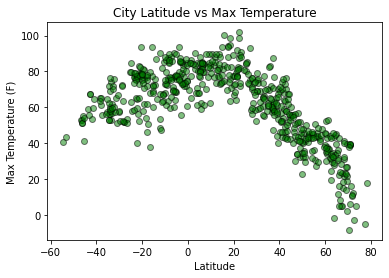

In [96]:

plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature")
print("The plot highlights a trend suggesting that MAX temp (F) reduces as Latitude Increases")
plt.savefig("City Latitude vs Max Temperature")

## Latitude vs. Humidity Plot

The Plot does not show any trends in Humidity (%) compared to an increase in Latitude


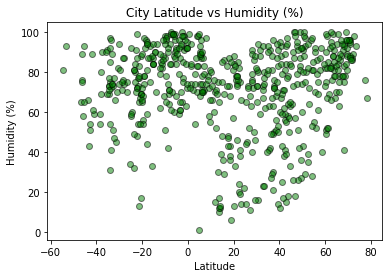

In [97]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%)")
print("The Plot does not show any trends in Humidity (%) compared to an increase in Latitude")
plt.savefig("City Latitude vs Humidity (%)")

## Latitude vs. Cloudiness Plot

The Plot does not show any trends in Cloudiness (%) compared to an increase in Latitude


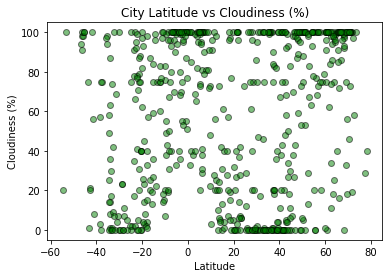

In [98]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%)")
print("The Plot does not show any trends in Cloudiness (%) compared to an increase in Latitude")
plt.savefig("City Latitude vs Cloudiness (%)")

## Latitude vs. Wind Speed Plot

The Plot does not show any trends in Wind Speed (mph) compared to an increase in Latitude


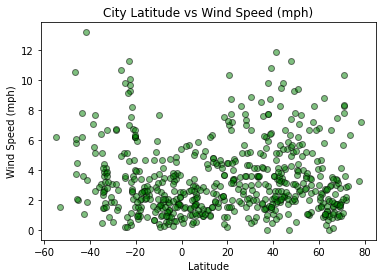

In [99]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (mph)")
print("The Plot does not show any trends in Wind Speed (mph) compared to an increase in Latitude")
plt.savefig("City Latitude vs Wind Speed (mph)")

## Linear Regression

In [100]:
#split weather_df into Northern hempisphere (Latitude > 0) and southern hemisphere (Latitude < 0)
northernHEM_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southernHEM_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

In [101]:
northernHEM_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Wind Speed (mph),Max Temp (F),Humidity (%)
0,georgetown,MY,2022-04-24 12:06:44,5.4112,100.335,20,2.06,87.998,74
2,gander,CA,2022-04-24 12:05:27,48.9682,-54.5906,100,9.26,32.432,100
3,avera,US,2022-04-24 12:07:48,33.194,-82.5271,1,3.54,66.524,80
9,ponta do sol,PT,2022-04-24 12:07:56,32.6667,-17.1,46,1.96,60.98,67
14,dikson,RU,2022-04-24 12:08:03,73.5069,80.5464,100,6.32,5.162,93
...,...,...,...,...,...,...,...,...,...
633,beauvais,FR,2022-04-24 12:21:44,49.4167,2,0,3.09,47.894,92
634,sisimiut,GL,2022-04-24 12:21:46,66.9395,-53.6735,100,2.38,28.436,96
635,baghdad,IQ,2022-04-24 12:21:47,33.3406,44.4009,100,3.09,77.18,23
636,mega,ET,2022-04-24 12:21:48,4.05,38.3,82,2.64,61.106,83


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [132]:
plt.style.use('default')

The r-squared value is : 0.76


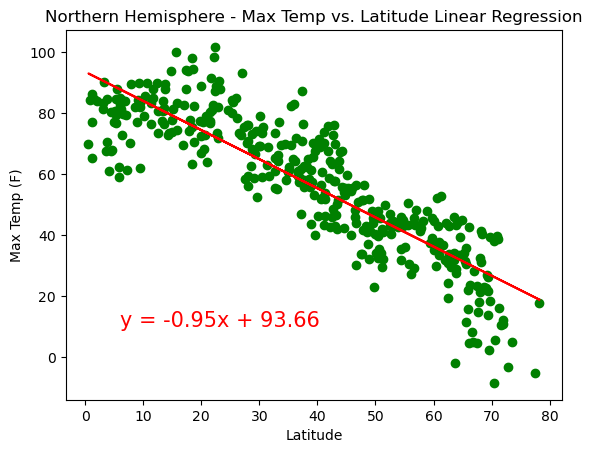

In [140]:

#variables
x_values = pd.to_numeric(northernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(northernHEM_df['Max Temp (F)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is : 0.32


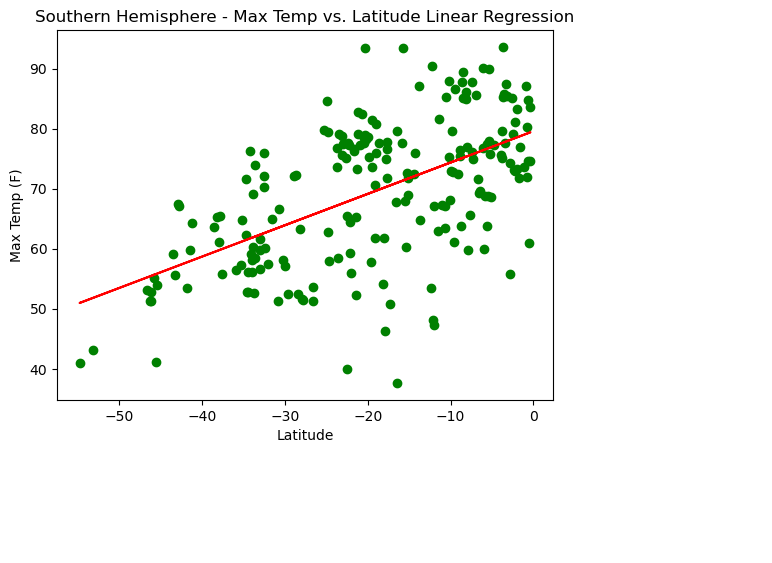

In [143]:
#variables
x_values = pd.to_numeric(southernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(southernHEM_df['Max Temp (F)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is : 0.05


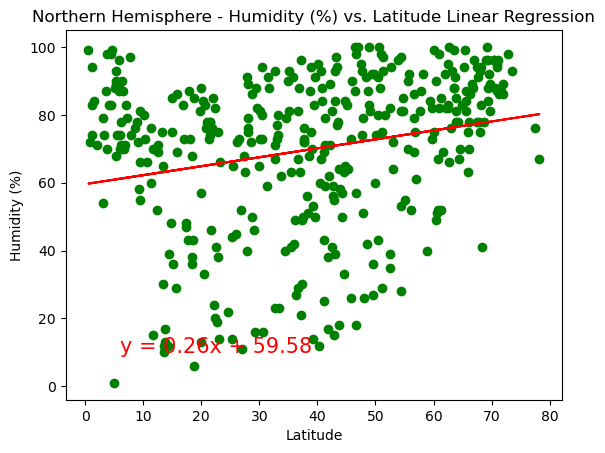

In [146]:
#variables
x_values = pd.to_numeric(northernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(northernHEM_df['Humidity (%)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is : 0.09


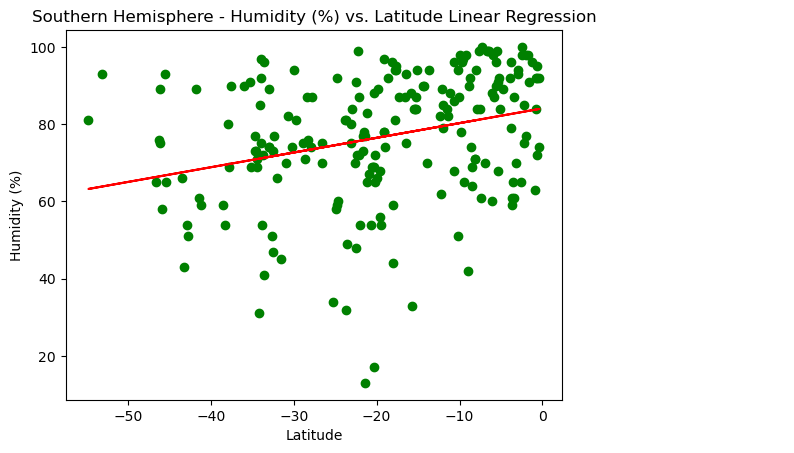

In [147]:
#variables
x_values = pd.to_numeric(southernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(southernHEM_df['Humidity (%)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is : 0.04


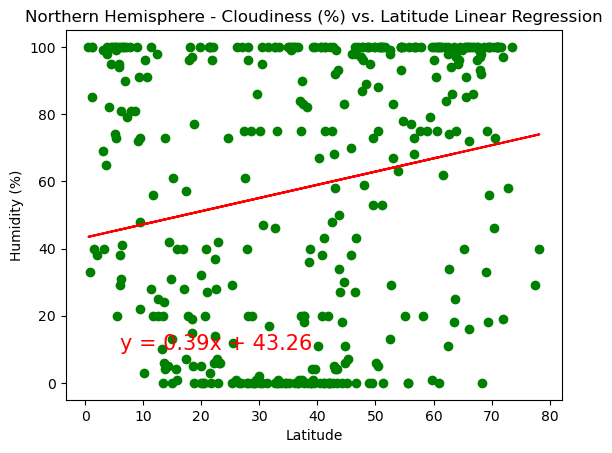

In [148]:
#variables
x_values = pd.to_numeric(northernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(northernHEM_df['Cloudiness (%)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is : 0.1


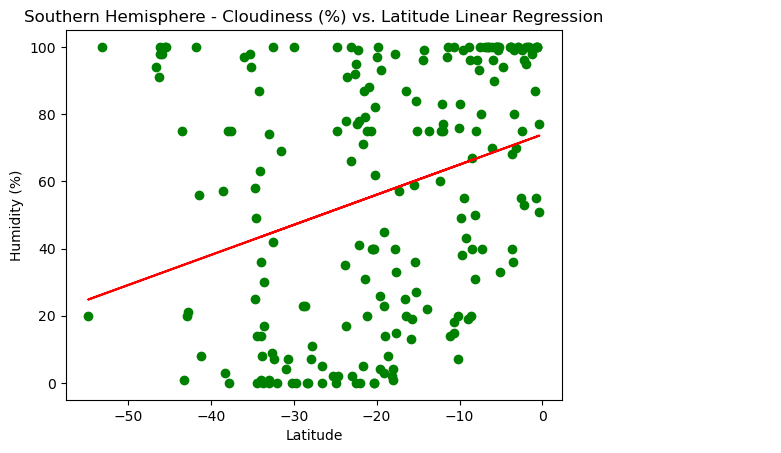

In [149]:
#variables
x_values = pd.to_numeric(southernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(southernHEM_df['Cloudiness (%)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is : 0.01


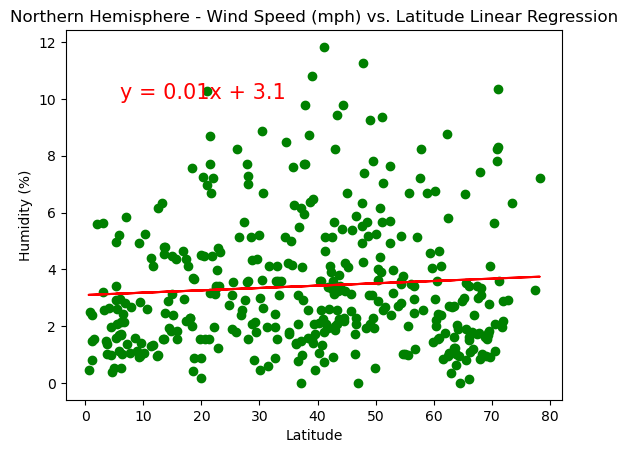

In [150]:
#variables
x_values = pd.to_numeric(northernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(northernHEM_df['Wind Speed (mph)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is : 0.11


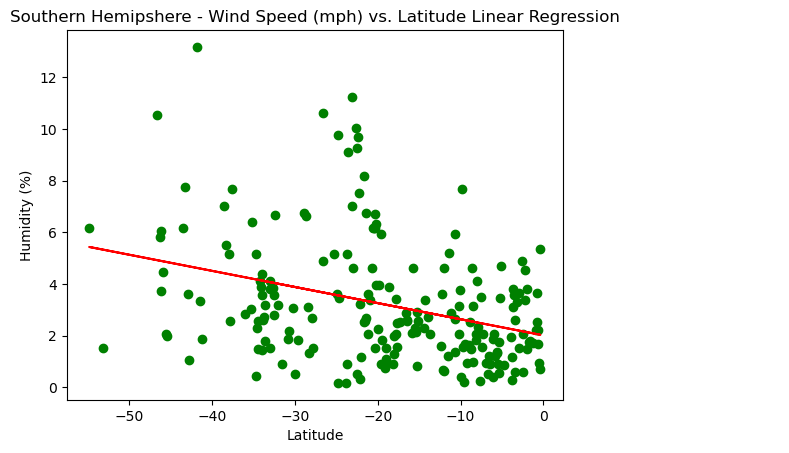

In [151]:
#variables
x_values = pd.to_numeric(southernHEM_df['Latitude']).astype(float)
y_values = pd.to_numeric(southernHEM_df['Wind Speed (mph)']).astype(float)
#regression creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatter plot
plt.scatter(x_values,y_values, color = "green")
#annotations
plt.plot(x_values,regression,"r-")
plt.annotate(Equation,(6,10),fontsize=15,color="red")
plt.title("Southern Hemipshere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f'The r-squared value is : {round(rvalue**2,2)}')
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")